# Is  eating gluten-free more expensive? Analysis Pie Charts

This notebook answer the question with the following charts using the Yelp API data and Census data for the randomized zipcodes selected.

Figures:
1. pie chart of total GF restaurants by price
2. pie chart of total All restaurants by price
3. bubble plot of median income

In [5]:
%matplotlib inline
#dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np

pd.set_option('display.max_columns', 500)

# File to Load 
mergedData = "AnalysisData/Final_merged_data.csv"
yelpData = "../riley/summarizedYelpData.csv"
incomeData = "../riley/incomebyzip.csv"

# Read the income and Yelp Data
finalMergedDataDF = pd.read_csv(mergedData)
yelpDataDF = pd.read_csv(yelpData)
incomeDataDF = pd.read_csv(incomeData)


In [6]:
yelpIncomeMerge = pd.merge(yelpDataDF,incomeDataDF, how ="left", left_on= "Zipcode", right_on ="ZipCode")
# yelpIncomeMerge.count()
yelpIncomeMerge.head(1)

,Unnamed: 0_x,Zipcode,GF_Total,GF_Price_1,GF_Price_2,GF_Price_3,GF_Price_4,GF_Price_0,GF_Rating_10,GF_Rating_15,GF_Rating_20,GF_Rating_25,GF_Rating_30,GF_Rating_35,GF_Rating_40,GF_Rating_45,GF_Rating_50,GF_Price_Mean,GF_Rating_Mean,GF_Price_Std,GF_Rating_Std,ALL_Total,ALL_Price_1,ALL_Price_2,ALL_Price_3,ALL_Price_4,ALL_Price_0,ALL_Rating_10,ALL_Rating_15,ALL_Rating_20,ALL_Rating_25,ALL_Rating_30,ALL_Rating_35,ALL_Rating_40,ALL_Rating_45,ALL_Rating_50,ALL_Price_Mean,ALL_Rating_Mean,ALL_Price_Std,ALL_Rating_Std,Unnamed: 0_y,Population,"Households with household income $200,000 or more",Median family income,Households,Name,zipcode,"Percent of households with income over $200,000",ZipCode
0,0,90006,26,7,15,2,0,0,0,1,1,0,0,6,13,4,1,1.791667,3.826923,0.58823,0.72031,217,98,76,4,0,0,4,7,8,12,20,47,68,34,17,1.47191,3.663594,0.54389,0.890907,29884.0,61230.0,155.0,32273.0,19474.0,ZCTA5 90006,90006.0,0.795933,90006.0


In [7]:
yelpIncomeMerge['GF_Price_0'] = yelpIncomeMerge['GF_Total'] - yelpIncomeMerge['GF_Price_1'] - yelpIncomeMerge['GF_Price_2'] - yelpIncomeMerge['GF_Price_3'] - yelpIncomeMerge['GF_Price_4']
yelpIncomeMerge['ALL_Price_0'] = yelpIncomeMerge['ALL_Total'] - yelpIncomeMerge['ALL_Price_1'] - yelpIncomeMerge['ALL_Price_2'] - yelpIncomeMerge['ALL_Price_3'] - yelpIncomeMerge['ALL_Price_4']

## Pie Chart: Total Gluten-Free Friendly Restaurants by Yelp Price Categories
For this analysis, the Yelp data and Census data was merged and totals for each price categories were tallied.

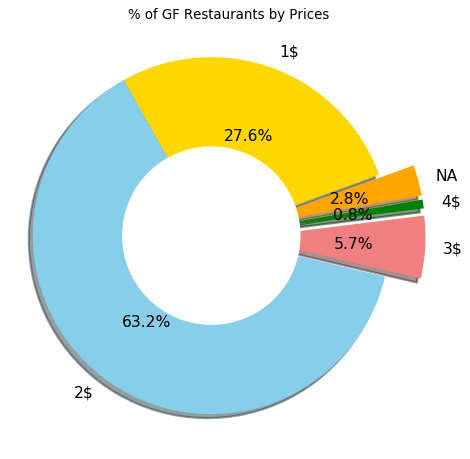

array([0.27593085, 0.63164894, 0.05651596, 0.00797872, 0.02792553])

In [8]:
# Pie Chart of Total GF Restaurants by Price

# change inline plot sizes
fig=plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')

gfAllNonNA = yelpIncomeMerge.dropna(how='any')
gfAllNonNA

gfAllTotal = gfAllNonNA['GF_Total'].sum()
gfAllTotal

gfPrice1 = gfAllNonNA['GF_Price_1'].sum()
gfPrice1

gfPrice2 = gfAllNonNA['GF_Price_2'].sum()
gfPrice2

gfPrice3 = gfAllNonNA['GF_Price_3'].sum()
gfPrice3

gfPrice4 = gfAllNonNA['GF_Price_4'].sum()
gfPrice4

gfPrice5 = gfAllNonNA['GF_Price_0'].sum()
gfPrice5

prices = ['1$','2$','3$', '4$', 'NA']
gfPriceCount = [gfPrice1,gfPrice2,gfPrice3,gfPrice4,gfPrice5]
percentPrices = gfPriceCount/gfAllTotal

colors = ["gold", "skyblue", "lightcoral", "green","orange"]
# Build Pie Chart
plt.title("% of GF Restaurants by Prices")
plt.pie(percentPrices, explode=(0,0,0.2,0.2,0.2), labels=prices, colors=colors,
        autopct="%1.1f%%",pctdistance=0.60,rotatelabels=False, shadow=True, startangle=20,textprops={'fontsize': 14},
       wedgeprops={'linewidth':2})

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.savefig('GF Restaurants PieChart.png')
plt.show()
percentPrices

## Pie Chart: Total All Restaurants by Yelp Price Categories
For this analysis, the Yelp data and Census data was merged and totals for each price categories were tallied.

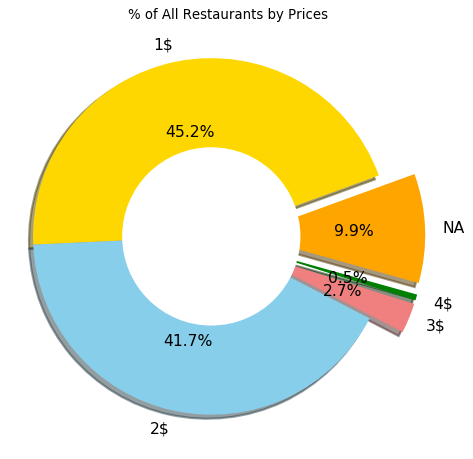

In [11]:
# Pie Chart of Total ALL Restaurants by Price

# change inline plot sizes
fig=plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')

allTotal = gfAllNonNA['ALL_Total'].sum()
allTotal

allPrice1 = gfAllNonNA['ALL_Price_1'].sum()
allPrice1

allPrice2 = gfAllNonNA['ALL_Price_2'].sum()
allPrice2

allPrice3 = gfAllNonNA['ALL_Price_3'].sum()
allPrice3

allPrice4 = gfAllNonNA['ALL_Price_4'].sum()
allPrice4

allPrice5 = gfAllNonNA['ALL_Price_0'].sum()
allPrice5

prices2 = ['1$','2$','3$', '4$', 'NA']
allPriceCount = [allPrice1, allPrice2, allPrice3, allPrice4, allPrice5]
allpercentPrices = allPriceCount/allTotal

# Build Pie Chart
plt.title("% of All Restaurants by Prices")
plt.pie(allpercentPrices, explode=(0,0,0.2,0.2,0.2), labels=prices, colors=colors,
        autopct="%1.1f%%",pctdistance=0.60,rotatelabels=False, shadow=True, startangle=20,textprops={'fontsize': 14},
       wedgeprops={'linewidth':2})

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.savefig('All Restaurants PieChart.png')
plt.show()

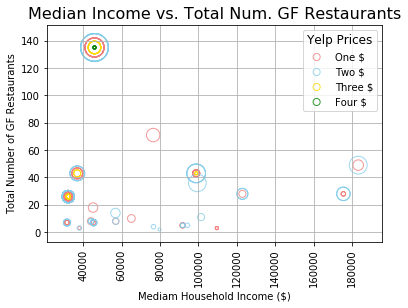

In [12]:
#Figure of GF restaurants and mean income

# Obtain the x and y coordinates for each of the three city types
# for guide on bubble plots
# https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/
# https://pythonspot.com/matplotlib-scatterplot/

# filter (locate) dataframes by each Price types.
dollar1 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $'] , ['Median family income','Total GF Rest', 'Total Number GF $']]
dollar2 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$'], ['Median family income','Total GF Rest', 'Total Number GF $$']]
dollar3 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$$'], ['Median family income','Total GF Rest', 'Total Number GF $$$']]
dollar4 = finalMergedDataDF.loc[finalMergedDataDF['Total Number GF $$$$'], ['Median family income','Total GF Rest', 'Total Number GF $$$$']]

# Build the scatter plots for each price types
# Incorporate the other graph properties
# s is the z axis for getting driver count size(circle sizes
dollar1_plot = plt.scatter(dollar1['Median family income'], dollar1['Total GF Rest'], s=dollar1['Total Number GF $']*10, c='lightcoral', alpha=0.8, edgecolors="lightcoral", label='One $', linewidth=1)
dollar2_plot = plt.scatter(dollar2['Median family income'], dollar2['Total GF Rest'], s=dollar2['Total Number GF $$']*10, c='skyblue', alpha=0.8, edgecolors="skyblue", label='Two $', linewidth=1)
dollar3_plot = plt.scatter(dollar3['Median family income'], dollar3['Total GF Rest'], s=dollar3['Total Number GF $$$']*10, c='gold', alpha=0.8, edgecolors="gold", label='Three $', linewidth=1)
dollar4_plot = plt.scatter(dollar4['Median family income'], dollar4['Total GF Rest'], s=dollar4['Total Number GF $$$$']*10, c='green', alpha=0.8, edgecolors="green", label='Four $', linewidth=1)

dollar1_plot.set_facecolor("none")
dollar2_plot.set_facecolor("none")
dollar3_plot.set_facecolor("none")
dollar4_plot.set_facecolor("none")
plt.xticks(rotation='vertical')

# Create a legend
legend = plt.legend(handles=[dollar1_plot, dollar2_plot, dollar3_plot,dollar4_plot],title='Yelp Prices',prop={'size':10}, loc="best")
legend.legendHandles[0]._sizes =[50]
legend.legendHandles[1]._sizes =[50]
legend.legendHandles[2]._sizes =[50]
legend.legendHandles[3]._sizes =[50]
legend.get_title().set_fontsize('12')

plt.grid(b=True)
plt.title('Median Income vs. Total Num. GF Restaurants', loc="center",fontdict={'fontsize':16})
plt.ylabel('Total Number of GF Restaurants')
plt.xlabel('Mediam Household Income ($)')


# Save Figure
save = plt.savefig('MedianIncome_TotalGF.png')

# Show the chart
plt.show()

